# Serie de Fourier Ejemplo

Sea la señal:

\begin{equation}
x(t) = \begin{cases} 1, & -T/2 \leq t < 0 \\ -1, & 0 \leq t < T/2 \end{cases}
\end{equation}


Text(0, 0.5, 'x(t)')

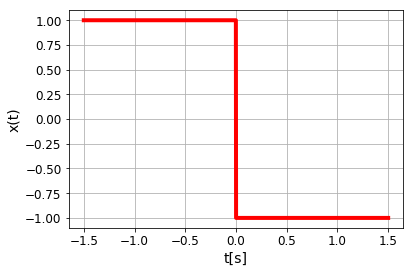

In [2]:
# Para graficar
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 3 #3 segundos de grafica
Fs = 500 # 500 muestras por segundo
Nm = T*Fs #numero de muestras requeridas
tv = np.linspace(-T/2,T/2,Nm)

xo = np.concatenate((np.ones(int(Nm/2)), -np.ones(int(Nm/2))), axis=0)

plt.plot(tv,xo,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)


Su espectro en serie de Fourier se calcula como:

\begin{equation}
c_n = \frac{j}{n\pi}((-1)^n-1)
\end{equation}

donde

\begin{equation}
\hat{x}(t) = \sum\limits_{n=-N}^N{c_n e^{jnw_ot}}
\end{equation}


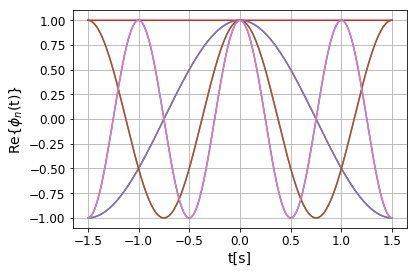

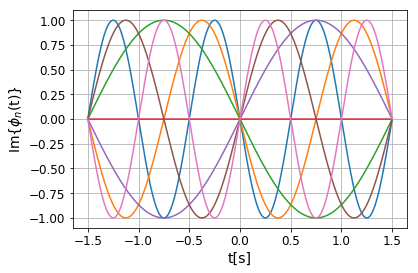

In [3]:
N = 10 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamentas
# %% definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)
    
# graficar bases
plt.plot(tv,np.real(phin))
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("Re{$\phi_n$(t)}",fontsize = 14)
plt.show()
    
plt.plot(tv,np.imag(phin))
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("Im{$\phi_n$(t)}",fontsize = 14)
plt.show()

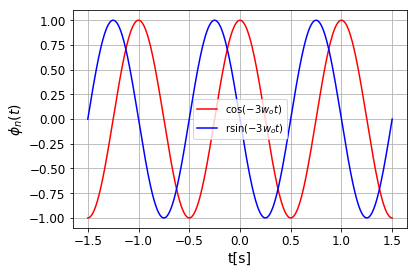

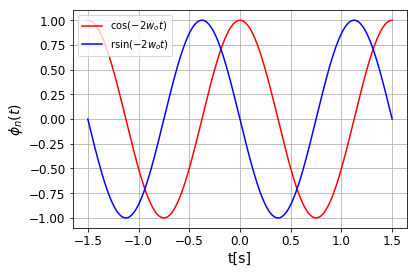

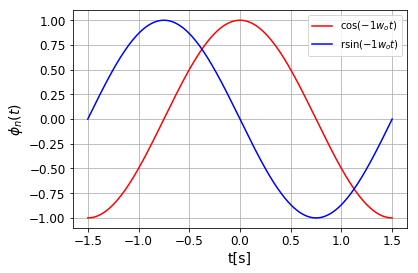

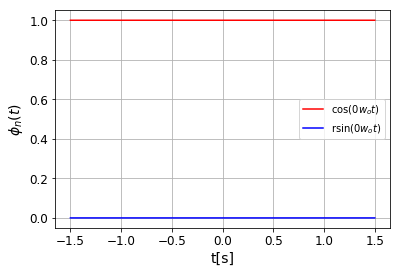

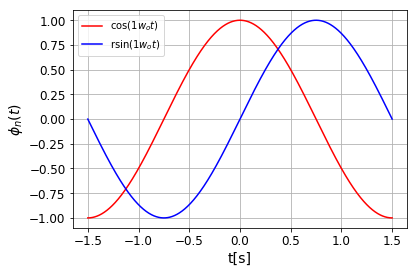

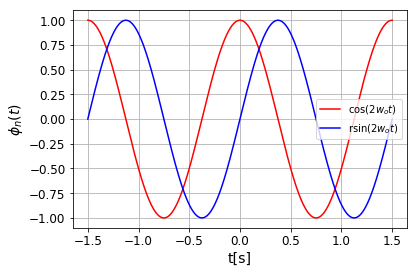

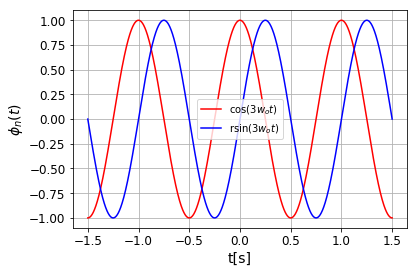

<Figure size 432x288 with 0 Axes>

In [4]:
plt.ion() #graficas por armónico separados
for n in range(-N,N+1,1):
    plt.plot(tv, np.real(phin[:,np.int(n+N)]), 'r',label = '$\cos(%dw_ot)$'%n)
    plt.plot(tv, np.imag(phin[:,np.int(n+N)]), 'b',label = 'r$\sin(%dw_ot)$'%n)
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n(t)$",fontsize = 14)
    plt.legend(loc='best')
    plt.grid()
    #plt.draw()
    plt.show()
    #plt.pause(0.01)
    plt.clf()

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


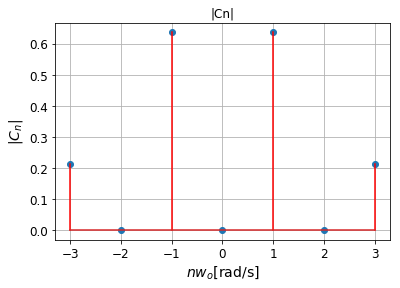

In [6]:
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = ((1j)/(nv*np.pi))*(1-(-1)**nv) 
Cn[N] = 0 
#graficar espectro
#plt.figure(figsize = (10, 8))
plt.stem(nv, abs(Cn), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()
        

C:\Users\andre\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


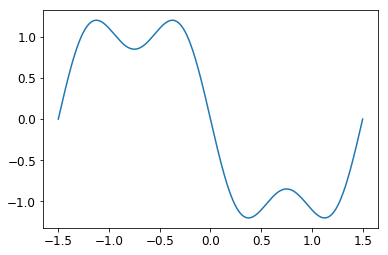

In [7]:
xe = phin @ Cn  #producto matricial para calcular componentes espectrales
plt.plot(tv,xe)